In [45]:
#pip install citipy
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
from citipy import citipy
from config import wKey
from config import gKey
from datetime import datetime

In [8]:
#create lats and longs
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
latLngs = zip(lats,lngs)
latLngs

In [9]:
# add random lata nd longs to list
coordinates = list(latLngs)
coordinates

[(4.871555851900382, 77.38390972128451),
 (80.71735501190415, 87.78576832404013),
 (-17.81976581923547, 163.28787867502155),
 (-27.853712560103318, -26.61663901689616),
 (50.242989780321466, -89.82558281931539),
 (7.744716841512044, 130.71263940353737),
 (9.871035185689777, -55.4579280693132),
 (-32.04560540073784, -175.94874500289265),
 (-56.53703463855944, 142.96851702668988),
 (-53.33026247463418, -51.810626454289604),
 (-24.229489381535274, 145.36910802024028),
 (51.268906051150566, -62.41497437710146),
 (30.812264502787215, -48.97151848133461),
 (35.37626055663965, -44.98974371862761),
 (-20.772639896132617, -40.64943154105137),
 (17.128641626285543, 89.36595536502563),
 (33.99817414666981, -56.104809962350274),
 (75.21273893910933, -152.51472056347987),
 (27.200553885076573, -66.77368874332217),
 (86.81439214362751, 50.54624995600662),
 (80.84562629612313, 138.38442527991992),
 (-6.474732381020161, 71.58140191362074),
 (-59.23181628436229, -131.4538435434415),
 (-51.0084683415582

In [10]:
#create city list
cities = []
for coordinate in coordinates:
    nearestCity = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    
    if nearestCity not in cities:
                cities.append(nearestCity)

cities

    
    

['beruwala',
 'dikson',
 'poum',
 'vila velha',
 'thunder bay',
 'kloulklubed',
 'nieuw amsterdam',
 'vaini',
 'hobart',
 'necochea',
 'emerald',
 'havre-saint-pierre',
 'saint george',
 'torbay',
 'piuma',
 'paradwip',
 'barrow',
 'hamilton',
 'belushya guba',
 'nizhneyansk',
 'hithadhoo',
 'rikitea',
 'castro',
 'geraldton',
 'cayenne',
 'oussouye',
 'kapaa',
 'attawapiskat',
 'shadegan',
 'killybegs',
 'lakatoro',
 'yashkul',
 'nanortalik',
 'cherskiy',
 'shahr-e babak',
 'hasaki',
 'bredasdorp',
 'qaanaaq',
 'bluff',
 'stykkisholmur',
 'carnarvon',
 'atuona',
 'ancud',
 'manavalakurichi',
 'busselton',
 'tsihombe',
 'kodinsk',
 'new norfolk',
 'kavieng',
 'ushuaia',
 'victoria',
 'zhigansk',
 'cape town',
 'punta arenas',
 'mataura',
 'upernavik',
 'umzimvubu',
 'inta',
 'merauke',
 'souillac',
 'mys shmidta',
 'taolanaro',
 'mayo',
 'sioux lookout',
 'nome',
 'ribeira grande',
 'mehamn',
 'esperance',
 'tavatuy',
 'wahran',
 'khorramshahr',
 'yulara',
 'sentyabrskiy',
 'lebu',
 't

In [11]:
len(cities)

631

In [23]:
# empty list to hold weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + wKey
cityData = []

#Start logging
print ('Beginning Data Retrieval')
print ('------------------------')

#create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if (i%50 == 0 and i>=50):
        set_count+=1
        record_count = 1
        time.sleep(60)
    
    city_url = base_url + "&q=" + city.replace(" ","+")
    
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    record_count +=1
    
    try:
        cityWeather = requests.get(city_url).json()
        cLat = cityWeather['coord']['lat']
        cLng = cityWeather['coord']['lon']
        cMaxTemp = cityWeather['main']['temp_max']
        cHumid = cityWeather['main']['humidity']
        cClouds = cityWeather['clouds']['all']
        cWind = cityWeather ['wind']['speed']
        cCountry = cityWeather['sys']['country']
        cDate = datetime.utcfromtimestamp(cityWeather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        cityData.append({
            'City': city.title(),
            'Lat':cLat,
            'Lng':cLng,
            'Max Temp': cMaxTemp,
            'Humidity': cHumid,
            'Cloudiness': cClouds,
            'Wind Speed': cWind,
            'Country':cCountry,
            'Date': cDate
        })
    except:
        print('City not found, Skipping...')
        pass

print('----------------------')
print('Data Retrieval complete')
print('-----------------------')
            
        

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | beruwala
Processing Record 2 of set 1 | dikson
Processing Record 3 of set 1 | poum
Processing Record 4 of set 1 | vila velha
Processing Record 5 of set 1 | thunder bay
Processing Record 6 of set 1 | kloulklubed
Processing Record 7 of set 1 | nieuw amsterdam
Processing Record 8 of set 1 | vaini
Processing Record 9 of set 1 | hobart
Processing Record 10 of set 1 | necochea
Processing Record 11 of set 1 | emerald
Processing Record 12 of set 1 | havre-saint-pierre
Processing Record 13 of set 1 | saint george
Processing Record 14 of set 1 | torbay
Processing Record 15 of set 1 | piuma
Processing Record 16 of set 1 | paradwip
City not found, Skipping...
Processing Record 17 of set 1 | barrow
Processing Record 18 of set 1 | hamilton
Processing Record 19 of set 1 | belushya guba
City not found, Skipping...
Processing Record 20 of set 1 | nizhneyansk
City not found, Skipping...
Processing Record 21 of set 1 | hitha

Processing Record 34 of set 4 | pangnirtung
Processing Record 35 of set 4 | okandja
City not found, Skipping...
Processing Record 36 of set 4 | qasigiannguit
Processing Record 37 of set 4 | kerouane
Processing Record 38 of set 4 | mount gambier
Processing Record 39 of set 4 | preston
Processing Record 40 of set 4 | nantucket
Processing Record 41 of set 4 | mercedes
Processing Record 42 of set 4 | turbat
Processing Record 43 of set 4 | medina del campo
Processing Record 44 of set 4 | padang
Processing Record 45 of set 4 | ambilobe
Processing Record 46 of set 4 | nuuk
Processing Record 47 of set 4 | dondo
Processing Record 48 of set 4 | arraial do cabo
Processing Record 49 of set 4 | nouadhibou
Processing Record 50 of set 4 | payakumbuh
Processing Record 1 of set 5 | vestmannaeyjar
Processing Record 2 of set 5 | ngukurr
City not found, Skipping...
Processing Record 3 of set 5 | arona
Processing Record 4 of set 5 | grindavik
Processing Record 5 of set 5 | abaza
Processing Record 6 of set 

Processing Record 23 of set 8 | port keats
Processing Record 24 of set 8 | cassino
Processing Record 25 of set 8 | anloga
Processing Record 26 of set 8 | peniche
Processing Record 27 of set 8 | ferme-neuve
Processing Record 28 of set 8 | warqla
City not found, Skipping...
Processing Record 29 of set 8 | rujewa
Processing Record 30 of set 8 | murmashi
Processing Record 31 of set 8 | sotnikovskoye
Processing Record 32 of set 8 | filadelfia
Processing Record 33 of set 8 | amli
Processing Record 34 of set 8 | lorengau
Processing Record 35 of set 8 | agadir
Processing Record 36 of set 8 | coahuayana
Processing Record 37 of set 8 | berbera
Processing Record 38 of set 8 | homer
Processing Record 39 of set 8 | tasiilaq
Processing Record 40 of set 8 | ternate
Processing Record 41 of set 8 | caceres
Processing Record 42 of set 8 | dhidhdhoo
Processing Record 43 of set 8 | abu samrah
Processing Record 44 of set 8 | chipiona
Processing Record 45 of set 8 | hihifo
City not found, Skipping...
Proces

Processing Record 12 of set 12 | tepalcatepec
Processing Record 13 of set 12 | izazi
Processing Record 14 of set 12 | poquoson
Processing Record 15 of set 12 | wencheng
Processing Record 16 of set 12 | orlik
Processing Record 17 of set 12 | dorobantu
Processing Record 18 of set 12 | ouadda
Processing Record 19 of set 12 | karasburg
Processing Record 20 of set 12 | ust-kamchatsk
City not found, Skipping...
Processing Record 21 of set 12 | bada
Processing Record 22 of set 12 | port blair
Processing Record 23 of set 12 | kieta
Processing Record 24 of set 12 | sabaudia
Processing Record 25 of set 12 | kidal
Processing Record 26 of set 12 | airai
Processing Record 27 of set 12 | punta cardon
Processing Record 28 of set 12 | skjaerhollen
City not found, Skipping...
Processing Record 29 of set 12 | faya
Processing Record 30 of set 12 | rocha
Processing Record 31 of set 12 | ilave
Processing Record 32 of set 12 | pisco
Processing Record 33 of set 12 | alyangula
Processing Record 34 of set 12 |

In [25]:
len(cityData)

576

In [28]:
cityDataDf = pd.DataFrame(cityData)
cityDataDf.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beruwala,6.4788,79.9828,26.34,86,25,4.26,LK,2022-05-22 20:04:28
1,Dikson,73.5069,80.5464,-6.40,92,48,3.51,RU,2022-05-22 20:04:28
2,Poum,-20.2333,164.0167,25.97,78,0,5.08,NC,2022-05-22 20:04:28
3,Vila Velha,-20.3297,-40.2925,22.16,70,52,2.24,BR,2022-05-22 20:00:18
4,Thunder Bay,48.4001,-89.3168,10.99,40,100,4.12,CA,2022-05-22 19:59:37
5,Kloulklubed,7.0419,134.2556,23.28,77,100,3.99,PW,2022-05-22 20:04:29
6,Nieuw Amsterdam,5.8833,-55.0833,26.01,86,40,0.00,SR,2022-05-22 20:04:29
7,Vaini,-21.2000,-175.2000,25.27,82,55,6.39,TO,2022-05-22 20:04:29
8,Hobart,-42.8794,147.3294,10.14,86,100,4.12,AU,2022-05-22 20:00:18
9,Necochea,-38.5473,-58.7368,14.77,51,100,5.31,AR,2022-05-22 20:00:30


In [29]:
newCo = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
cityDataDf = cityDataDf[newCo]
cityDataDf.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beruwala,LK,2022-05-22 20:04:28,6.4788,79.9828,26.34,86,25,4.26
1,Dikson,RU,2022-05-22 20:04:28,73.5069,80.5464,-6.40,92,48,3.51
2,Poum,NC,2022-05-22 20:04:28,-20.2333,164.0167,25.97,78,0,5.08
3,Vila Velha,BR,2022-05-22 20:00:18,-20.3297,-40.2925,22.16,70,52,2.24
4,Thunder Bay,CA,2022-05-22 19:59:37,48.4001,-89.3168,10.99,40,100,4.12


In [30]:
output_data_file = 'weather_data/cities.csv'
cityDataDf.to_csv(output_data_file,index_label="City_ID")

In [35]:
#get relevant plotting fields
lats = cityDataDf['Lat']
maxTemps = cityDataDf['Max Temp']
humidity = cityDataDf['Humidity']
cloudiness = cityDataDf['Cloudiness']
windSpeed = cityDataDf['Wind Speed']

today=time.strftime('%x')
today

'05/22/22'

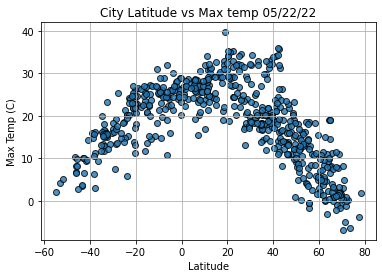

In [49]:

plt.scatter(lats,
           maxTemps,
           edgecolor='black',
           linewidth = 1,
           marker = 'o',
           alpha = 0.8,
           label='Cities')
plt.title(f"City Latitude vs Max temp {today}")
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

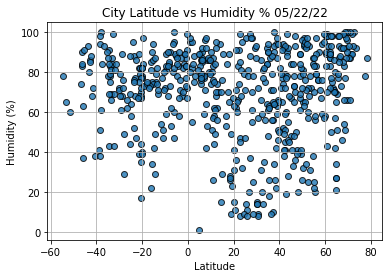

In [42]:
plt.scatter(lats,
           humidity,
           edgecolor='black',
           linewidth = 1,
           marker = 'o',
           alpha = 0.8,
           label='Cities')

plt.title(f"City Latitude vs Humidity % {today}")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

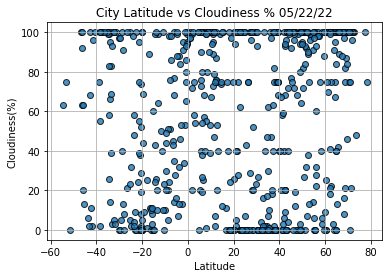

In [43]:
plt.scatter(lats,
           cloudiness,
           edgecolor='black',
           linewidth = 1,
           marker = 'o',
           alpha = 0.8,
           label='Cities')

plt.title(f"City Latitude vs Cloudiness % {today}")
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

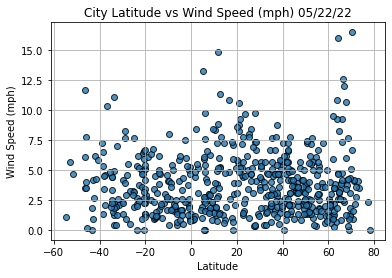

In [44]:
plt.scatter(lats,
           windSpeed,
           edgecolor='black',
           linewidth = 1,
           marker = 'o',
           alpha = 0.8,
           label='Cities')

plt.title(f"City Latitude vs Wind Speed (mph) {today}")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()

In [51]:
def plotLinearRegression (x_val, y_val, title, y_label, text_coord):
    #perform regression
    (slope,intercept,r_value,p_value,std_err) = linregress(x_val, y_val)
    
    #create linear regression values
    regressValues = x_val *slope + intercept
    
    #create regression equeation
    line_eq = (f'y = {slope:.2f}x + {intercept:.2f}')
    
    #plot the regresson line and scatter plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val,regressValues,'r')
    
    #annotate the graph
    plt.annotate(line_eq,(text_coord),fontsize = 15, color='red')
    plt.title(title)
    plt.xlabel ('Latitude')
    plt.ylabel(y_label)
    plt.show()
    


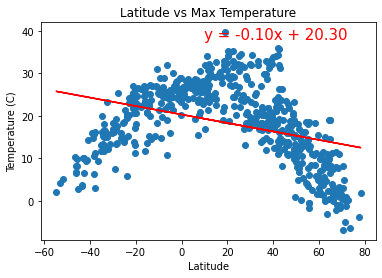

In [53]:
plotLinearRegression(lats,maxTemps,'Latitude vs Max Temperature','Temperature (C)',(10,38))

In [57]:
northernHemiDf = cityDataDf.loc[(cityDataDf['Lat']>=0)]

In [58]:
southernHemiDf = cityDataDf.loc[(cityDataDf['Lat'] <0)]
southernHemiDf.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Poum,NC,2022-05-22 20:04:28,-20.2333,164.0167,25.97,78,0,5.08
3,Vila Velha,BR,2022-05-22 20:00:18,-20.3297,-40.2925,22.16,70,52,2.24
7,Vaini,TO,2022-05-22 20:04:29,-21.2000,-175.2000,25.27,82,55,6.39
8,Hobart,AU,2022-05-22 20:00:18,-42.8794,147.3294,10.14,86,100,4.12
9,Necochea,AR,2022-05-22 20:00:30,-38.5473,-58.7368,14.77,51,100,5.31


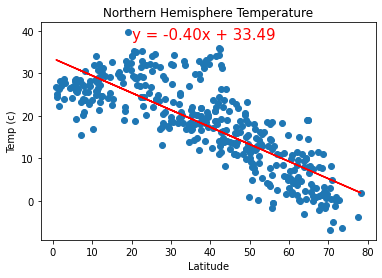

In [62]:
plotLinearRegression(northernHemiDf['Lat'],northernHemiDf['Max Temp'],'Northern Hemisphere Temperature','Temp (c)',(20,38))


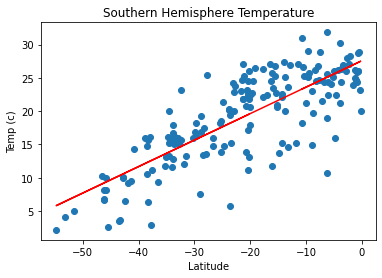

In [63]:
plotLinearRegression(southernHemiDf['Lat'],southernHemiDf['Max Temp'],'Southern Hemisphere Temperature','Temp (c)',(20,38))


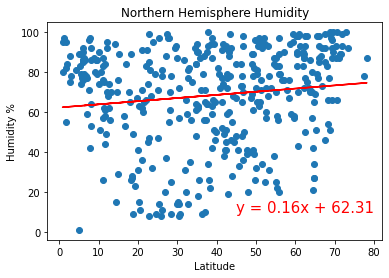

In [67]:
plotLinearRegression(northernHemiDf['Lat'],northernHemiDf['Humidity'],'Northern Hemisphere Humidity','Humidity %',(45,10))


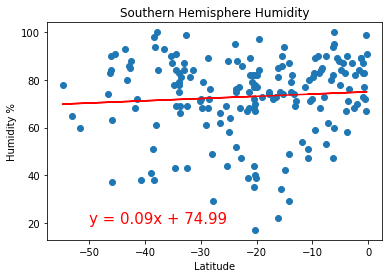

In [71]:
plotLinearRegression(southernHemiDf['Lat'],southernHemiDf['Humidity'],'Southern Hemisphere Humidity','Humidity %',(-50,20))


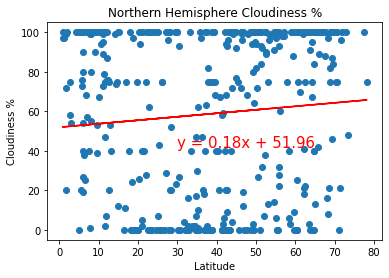

In [73]:
plotLinearRegression(northernHemiDf['Lat'],northernHemiDf['Cloudiness'],'Northern Hemisphere Cloudiness %','Cloudiness %',(30,42))


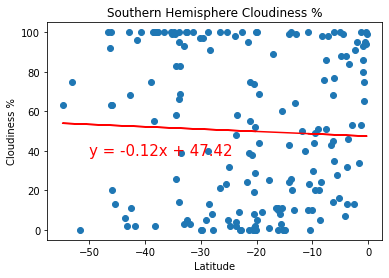

In [75]:
plotLinearRegression(southernHemiDf['Lat'],southernHemiDf['Cloudiness'],'Southern Hemisphere Cloudiness %','Cloudiness %',(-50,38))


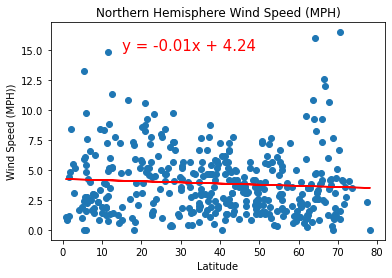

In [77]:
plotLinearRegression(northernHemiDf['Lat'],northernHemiDf['Wind Speed'],'Northern Hemisphere Wind Speed (MPH)','Wind Speed (MPH))',(15,15))


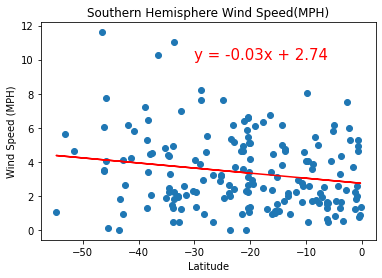

In [79]:
plotLinearRegression(southernHemiDf['Lat'],southernHemiDf['Wind Speed'],'Southern Hemisphere Wind Speed(MPH)','Wind Speed (MPH)',(-30,10))
